### Importing packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

### Reading data

In [12]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_folder =os.path.join(parent_dir,"data")
pwd = (os.path.join(data_folder,"synthetic_hostel_data.csv"))
df = pd.read_csv(pwd)
df.head()

,Location,Tv,Air_conditioner,Refrigerator,Water_heater,Modern_Wardrobe,Back_up_power_supply,Gym,Elevator,Modernized_bathrooms,Room size,Number of people in a room,Historical pricing data,Current Price
0,Kotei,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,3,3,4120,5768.0
1,Ayeduase,No,Yes,No,Yes,No,Yes,Yes,No,Yes,4,4,3030,4545.0
2,Bomsu,Yes,No,Yes,Yes,No,Yes,No,Yes,No,2,2,4610,5071.0
3,Bomsu,Yes,No,Yes,No,Yes,No,No,No,No,2,2,4240,4664.0
4,Kotei,Yes,No,No,Yes,Yes,No,No,Yes,No,4,4,2900,4060.0


### Exploratory analysis 

<Axes: >

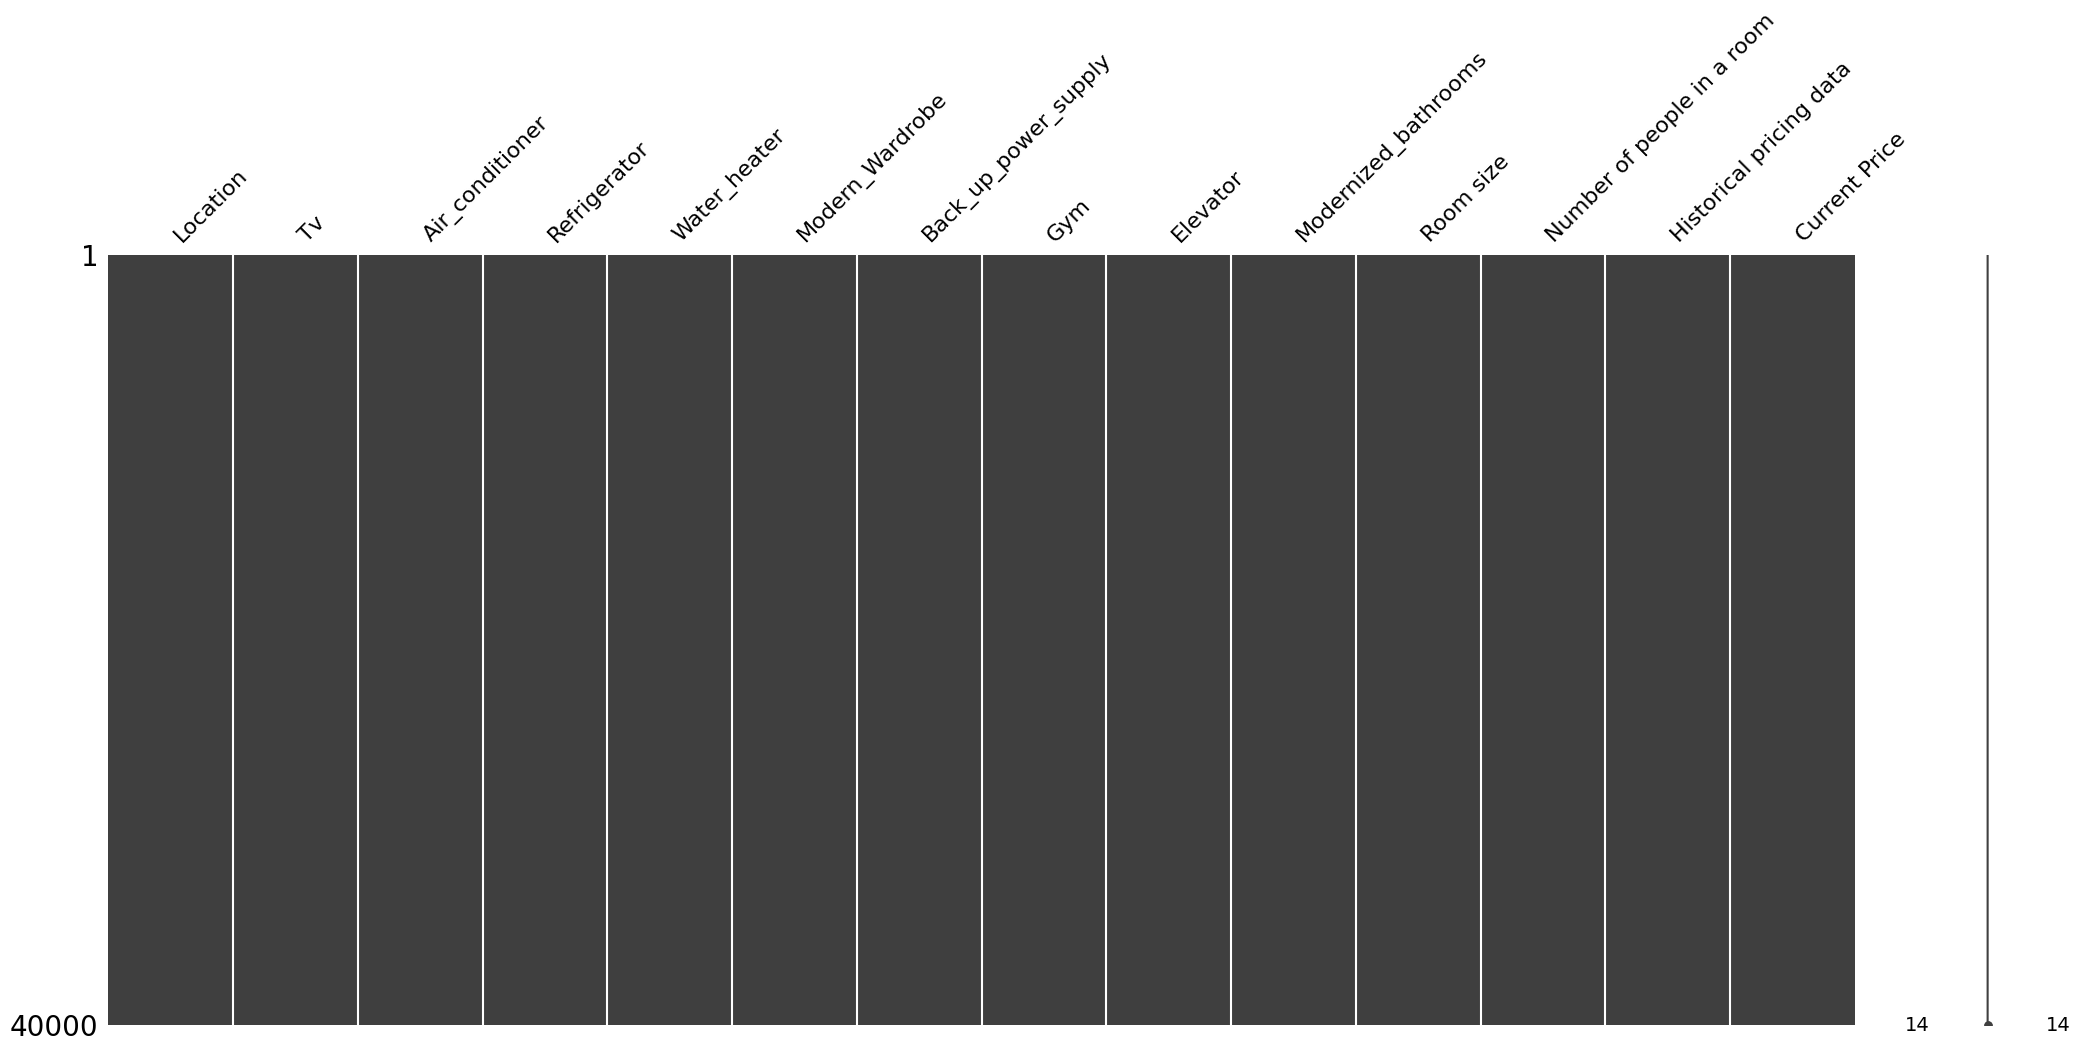

In [21]:
msno.matrix(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    40000 non-null  object 
 1   Tv                          40000 non-null  object 
 2   Air_conditioner             40000 non-null  object 
 3   Refrigerator                40000 non-null  object 
 4   Water_heater                40000 non-null  object 
 5   Modern_Wardrobe             40000 non-null  object 
 6   Back_up_power_supply        40000 non-null  object 
 7   Gym                         40000 non-null  object 
 8   Elevator                    40000 non-null  object 
 9   Modernized_bathrooms        40000 non-null  object 
 10  Room size                   40000 non-null  int64  
 11  Number of people in a room  40000 non-null  int64  
 12  Historical pricing data     40000 non-null  int64  
 13  Current Price               400

In [16]:
df.describe()

,Room size,Number of people in a room,Historical pricing data,Current Price
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,2.500375,2.500375,4482.606250,5940.571300
std,1.115361,1.115361,1281.635851,1868.401207
min,1.000000,1.000000,2500.000000,2750.000000
25%,2.000000,2.000000,3560.000000,4499.000000
50%,2.000000,2.000000,4230.000000,5590.000000
75%,3.000000,3.000000,4870.000000,7062.000000
max,4.000000,4.000000,6970.000000,11152.000000


In [19]:
df.columns

Index(['Location', 'Tv', 'Air_conditioner', 'Refrigerator', 'Water_heater',
       'Modern_Wardrobe', 'Back_up_power_supply', 'Gym', 'Elevator',
       'Modernized_bathrooms', 'Room size', 'Number of people in a room',
       'Historical pricing data', 'Current Price'],
      dtype='object')

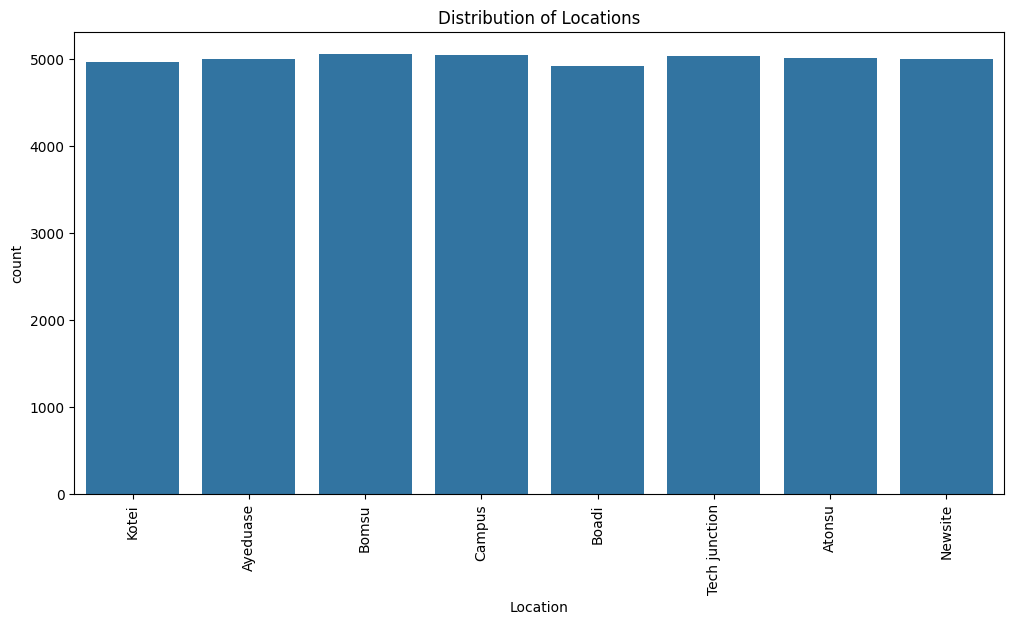

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=df)
plt.title('Distribution of Locations')
plt.xticks(rotation=90)
plt.show()